<img src="images/LOGO_2.jpg" width="600" />


# Linear Regression with Python

** This is mostly just code for reference

Your neighbor is a realtor and needs some assistance anticipating lodging costs. Hopefully you will some way or another make a model for his/her that permits his/her to place in a couple of highlights of a house and returns back a gauge of what the house would sell for. 

She/He has inquired as to whether you could get her out with your new information science abilities. You state truly, and conclude that Linear Regression may be a decent way to tackle this issue!

The data contains the following columns:

* 'Sqft':
* 'Floor': 
* 'Number of Livingrooms': Number of Rooms for Houses in same city
* 'Number of Bedrooms': Number of Bedrooms for Houses in same city
* 'TotalFloor':
* 'Price': Price that the house sold at

**IMPORTING lIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading the Dataset in the Notebook**

In [2]:
df = pd.read_csv('/root/Desktop/house_rental_data.csv')

# EDA

In [3]:
df.head()   # gives by default the top five rows of the data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
df.tail()    #gives bottom five rows of the data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000
644,648,1376.946,6,7,3,2,1,36000


In [5]:
df.shape   #define the size of the data i.e (no. of rows * no. of columns)

(645, 8)

In [6]:
df.info()   #checking the value-counts and the type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
Unnamed: 0     645 non-null int64
Sqft           645 non-null float64
Floor          645 non-null int64
TotalFloor     645 non-null int64
Bedroom        645 non-null int64
Living.Room    645 non-null int64
Bathroom       645 non-null int64
Price          645 non-null int64
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [7]:
df.describe()   # To analyze the numeric column in the data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)    # dropping the non requires column

In [9]:
df.rename(columns={'Living.Room':'Livingroom'}, inplace=True)   #Renaming the column for better understanding

In [10]:
df.isnull().sum()   # checking if there is any empty or missing values in the data

Sqft          0
Floor         0
TotalFloor    0
Bedroom       0
Livingroom    0
Bathroom      0
Price         0
dtype: int64

**NOW SEEING THAT OUR DATA IS FINE WE WILL NOW PLAY WITH OUR DATA LIKE REMOVING THE COLUMNS THAT ARE NOT REQUIRED OR CHECKING THE CORRELATION OF COLUMNS WITH ONE ANOTHER WE CAN DO MANY THINGS MORE. SO WITHOUT A FURTHER A DUE LETS GET GOING!!**

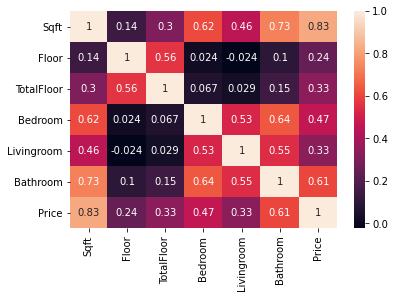

In [11]:
sns.heatmap(df.corr() , annot=True)
plt.show()

# Target variable Price was visualized in order to find its distribution

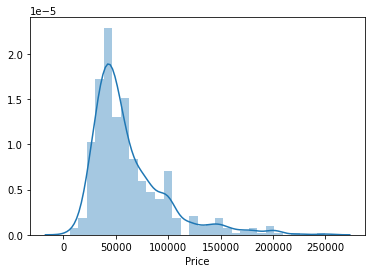

In [12]:
sns.distplot(df['Price'])

# It seems that our data is Positive Skew. So lets take a quick glane at positive skew before moving to the next part of the code

<img src="images/skew.webp" width="600" />

<img src="images/positive_skew.webp" width="300" />
**POSITIVE SKEW**

A positively skewed distribution is the distribution with the tail on its right side. The value of skewness for a positively skewed distribution is greater than zero. As you might have already understood by looking at the figure, the value of mean is the greatest one followed by median and then by mode.

So why is this happening?

Well, the answer to that is that the skewness of the distribution is on the right; it causes the mean to be greater than the median and eventually move to the right. Also, the mode occurs at the highest frequency of the distribution which is on the left side of the median. Therefore, mode < median < mean.

**CHECKING RIGHT SKEW VALUE**

In [13]:
print("Skew of Price:" , df["Price"].skew())

Skew of Price: 1.8377730040518983


# Solution to the Skewness
**The Log Transformation can be used to make highly skewed distributions less skewed. The comparison of the means of log-transformed data is actually a comparison of geometric means.**

# Log-Transforming Price
**Log-Transforming SalePrice with np.log**

<img src="images/log.png" width="600" />

In [14]:
df["log_Price"] = np.log(df["Price"]+1)

In [15]:
print("After treating Skewness:" , df["log_Price"].skew())

After treating Skewness: 0.24224050437935107


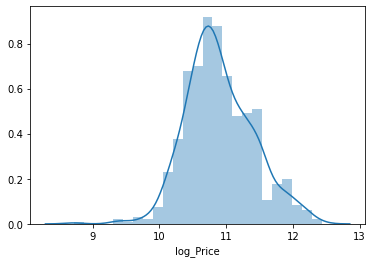

In [16]:
sns.distplot(df['log_Price'])

# Observation:
**This looks almost normal distribution with Skew of 0.24224050437935107**

# NOW CHECKING FOR OUTLIERS

**NOW THE VERY BASIC METHOD TO TREAT THE OUTLIERS IS TO REPLACE THE LAST VALUE BY EITHER MEAN , MEDIAN OR MODE OF THE DATA.
HERE I HAVE REPLACED THE LAST 7 VALUES OF THE DATA BY THE MODE OF THE DATA**

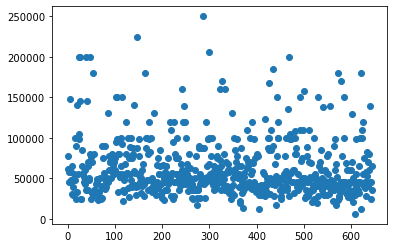

In [17]:
plt.scatter(df.index, df['Price'])

In [18]:
li = list(df['Price'].sort_values()[-7:].index)

In [19]:
df['Price'][li] = int(df.drop(li)['Price'].mode())

<ipython-input-19-43801167ea2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][li] = int(df.drop(li)['Price'].mode())


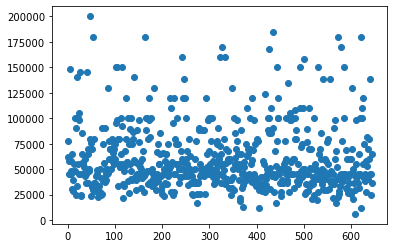

In [20]:
plt.scatter(df.index, df['Price'])

**After Treating the outliers we can see that the scatter plot has become a little more stable than the previous scatter plot. So now we will move towards MODEL PREPARATION**

# Machine Learning Model
**Once the data is cleaned we will now proceed further to make our machine learning model. As our target variable is continuous we will fit a regression model to the data-set**

# Linear Regression

** Selecting Target Variable **

In [21]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [22]:
y.shape

(645,)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5, random_state = 3300)

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
lr.coef_

array([-1.30570121e+00, -7.62028887e+02,  8.87553396e+01,  1.18392655e+03,
       -6.32293191e+02,  2.44441222e+03,  5.08121585e+04])

In [28]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Sqft,-1.305701
Floor,-762.028887
TotalFloor,88.755340
Bedroom,1183.926545
Livingroom,-632.293191
Bathroom,2444.412224
log_Price,50812.158462


In [29]:
lr.intercept_

-495832.70220130065

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
pred = lr.predict(X_test)

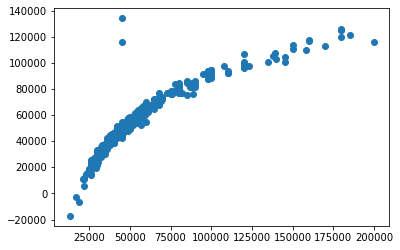

In [32]:
plt.scatter(y_test,pred)

In [33]:
from sklearn import metrics

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 8007.262259420163
MSE: 220022036.74449578
RMSE: 14833.139814095186


# Regularization Models

**What makes regression model more effective is its ability of regularizing. The term "regularizing" stands for models ability to structurally prevent overfitting by imposing a penalty on the coefficients.**

**There are three types of regularizations.**

> Ridge
>> Lasso
>>> Elastic Net

**These regularization methods work by penalizing the magnitude of the coefficients of features and at the same time minimizing the error between the predicted value and actual observed values. This minimization becomes a balance between the error (the difference between the predicted value and observed value) and the size of the coefficients. The only difference between Ridge and Lasso is the way they penalize the coefficients. Elastic Net is the combination of these two. Elastic Net adds both the sum of the squares errors and the absolute value of the squared error. To get more in-depth of it, let us review the least squared loss function.**

**Ordinary least squared loss function minimizes the residual sum of the square(RSS) to fit the data**

# minimize:RSS=∑i=1n(yi−y^i)2=∑i=1n(yi−(β0+∑j=1pβjxj))2

In [36]:
from sklearn.linear_model import Lasso,Ridge

# Ridge
**Ridge regression adds penalty equivalent to the square of the magnitude of the coefficients. This penalty is added to the least square loss function above and looks like this**

# minimize:RSS+Ridge=∑i=1n(yi−(β0+∑j=1pβjxj))2+λ2∑j=1pβ2j
 
**Here**

> λ2  is constant; a regularization parameter. It is also known as  α . The higher the value of this constant the more the impact in the loss function.
>> When  λ2  is 0, the loss funciton becomes same as simple linear regression.
>>> When  λ2  is  ∞ , the coefficients become 0
>>>> When  λ2  is between 0 and  ∞ (0< λ2 < ∞ ), The  λ2  parameter will decide the miagnitude given to the coefficients. The coefficients will be somewhere between 0 and ones for simple linear regression.

# ∑pj=1β2j , is the squared sum of all coefficients.

In [37]:
ridge = Ridge(alpha=20)   # alpha is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. 

In [38]:
ridge.fit(X_train,y_train)

Ridge(alpha=20)

In [39]:
pred_1 = ridge.predict(X_test)

In [40]:
print('Ridge MAE:', metrics.mean_absolute_error(y_test, pred_1))
print('Ridge MSE:', metrics.mean_squared_error(y_test, pred_1))
print('Ridge RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_1)))

Ridge MAE: 9494.517166391874
Ridge MSE: 258037422.5007463
Ridge RMSE: 16063.543273535459


# Lasso
**Lasso adds penalty equivalent to the absolute value of the sum of coefficients. This penalty is added to the least square loss function and replaces the squared sum of coefficients from Ridge.**

# minimize:RSS+Lasso=∑i=1n(yi−(β0+∑j=1pβjxj))2+λ1∑j=1p|βj|
 
**Here**

> λ2  is a constant similar to the Ridge function.
>> ∑pj=1|βj|  is the absolute sum of the coefficients.

In [41]:
lasso = Lasso(alpha=20)

In [42]:
lasso.fit(X_train,y_train)

Lasso(alpha=20)

In [43]:
pred_2 = lasso.predict(X_test)

In [44]:
print('Lasso MAE:', metrics.mean_absolute_error(y_test, pred_2))
print('Lasso MSE:', metrics.mean_squared_error(y_test, pred_2))
print('Lasso RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_2)))

Lasso MAE: 8011.144071990823
Lasso MSE: 220269866.07450238
Lasso RMSE: 14841.491369619913


# GOOD LUCK

**About the Author**

<p>Hi! It's <a href="https://www.intellicial.in/">Intellicial Team</a> the author of this notebook. I hope you found this Notebook easy to learn!</p>

<p>Copyright © . <a href="https://www.intellicial.in/">Intellicial Innovations</a> .</p>